<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/Test%20Solutions/MTB_P2_2s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Térmicas B - P2 - 2s2024

## Enunciado

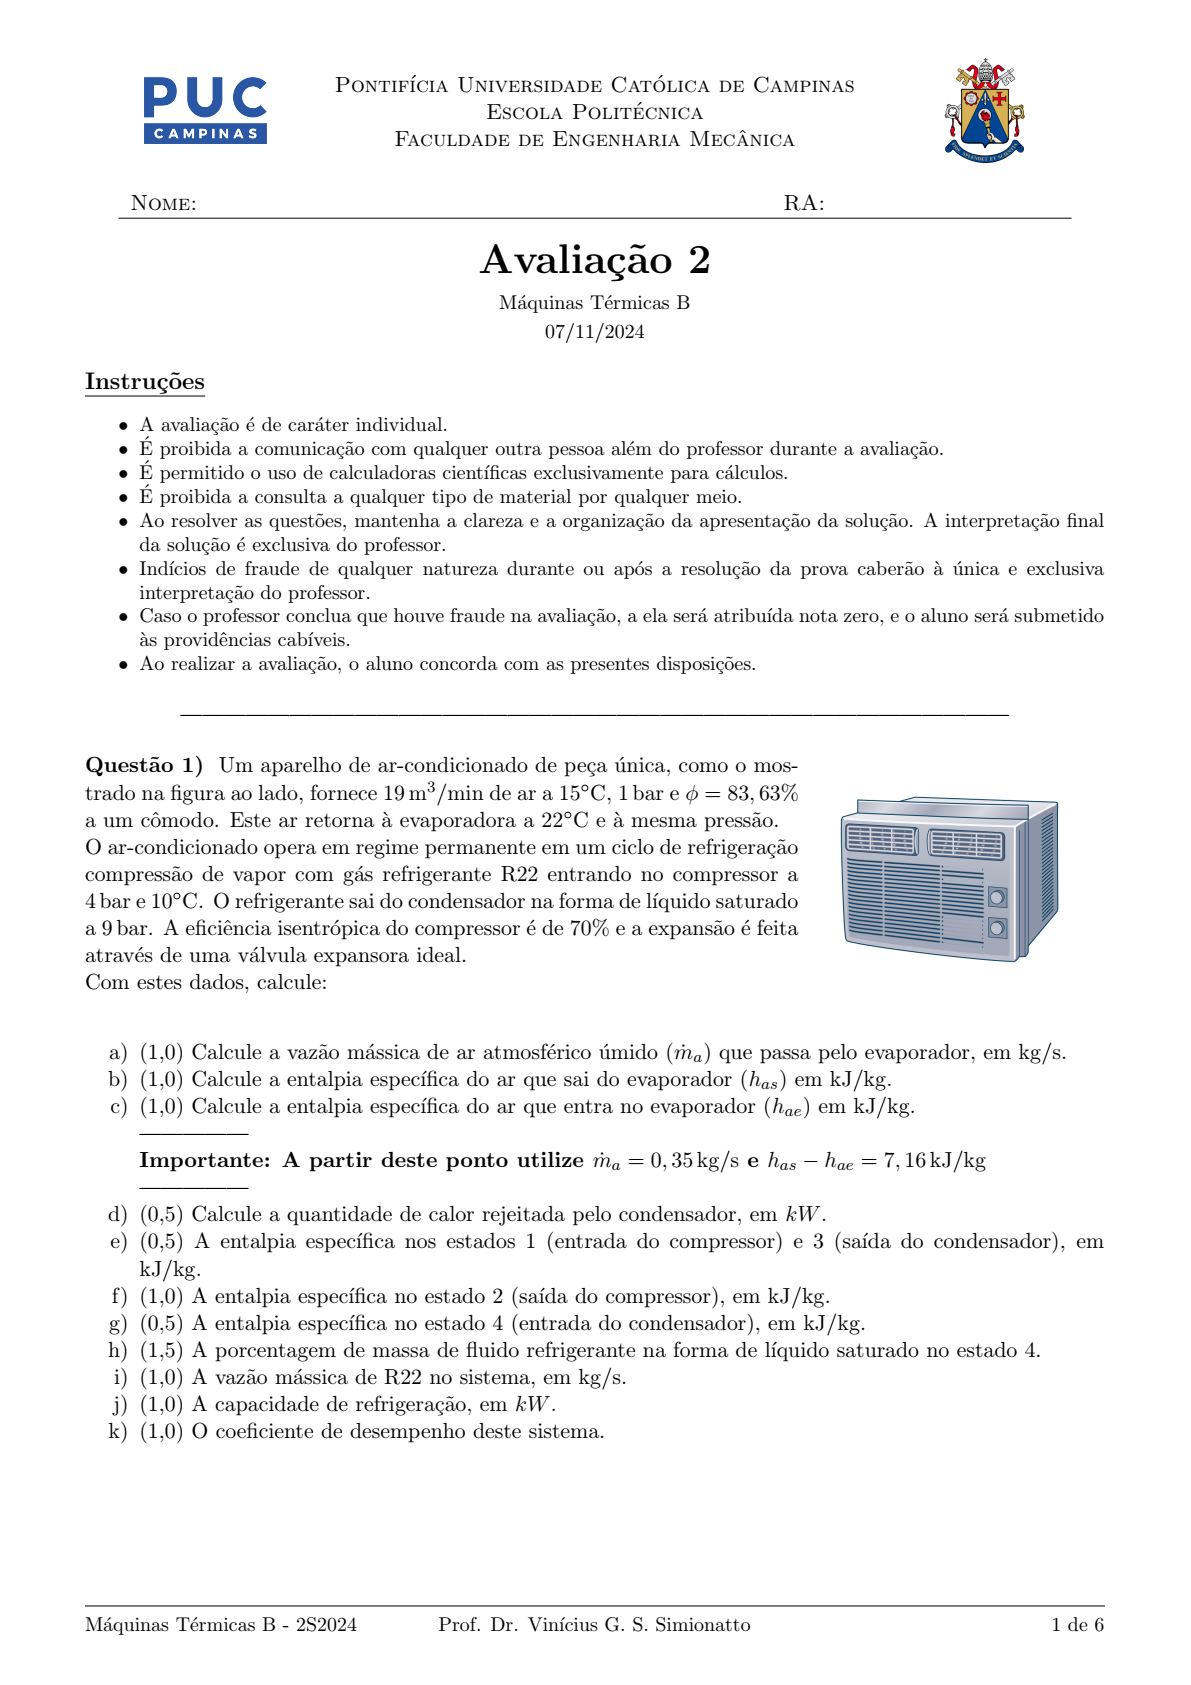

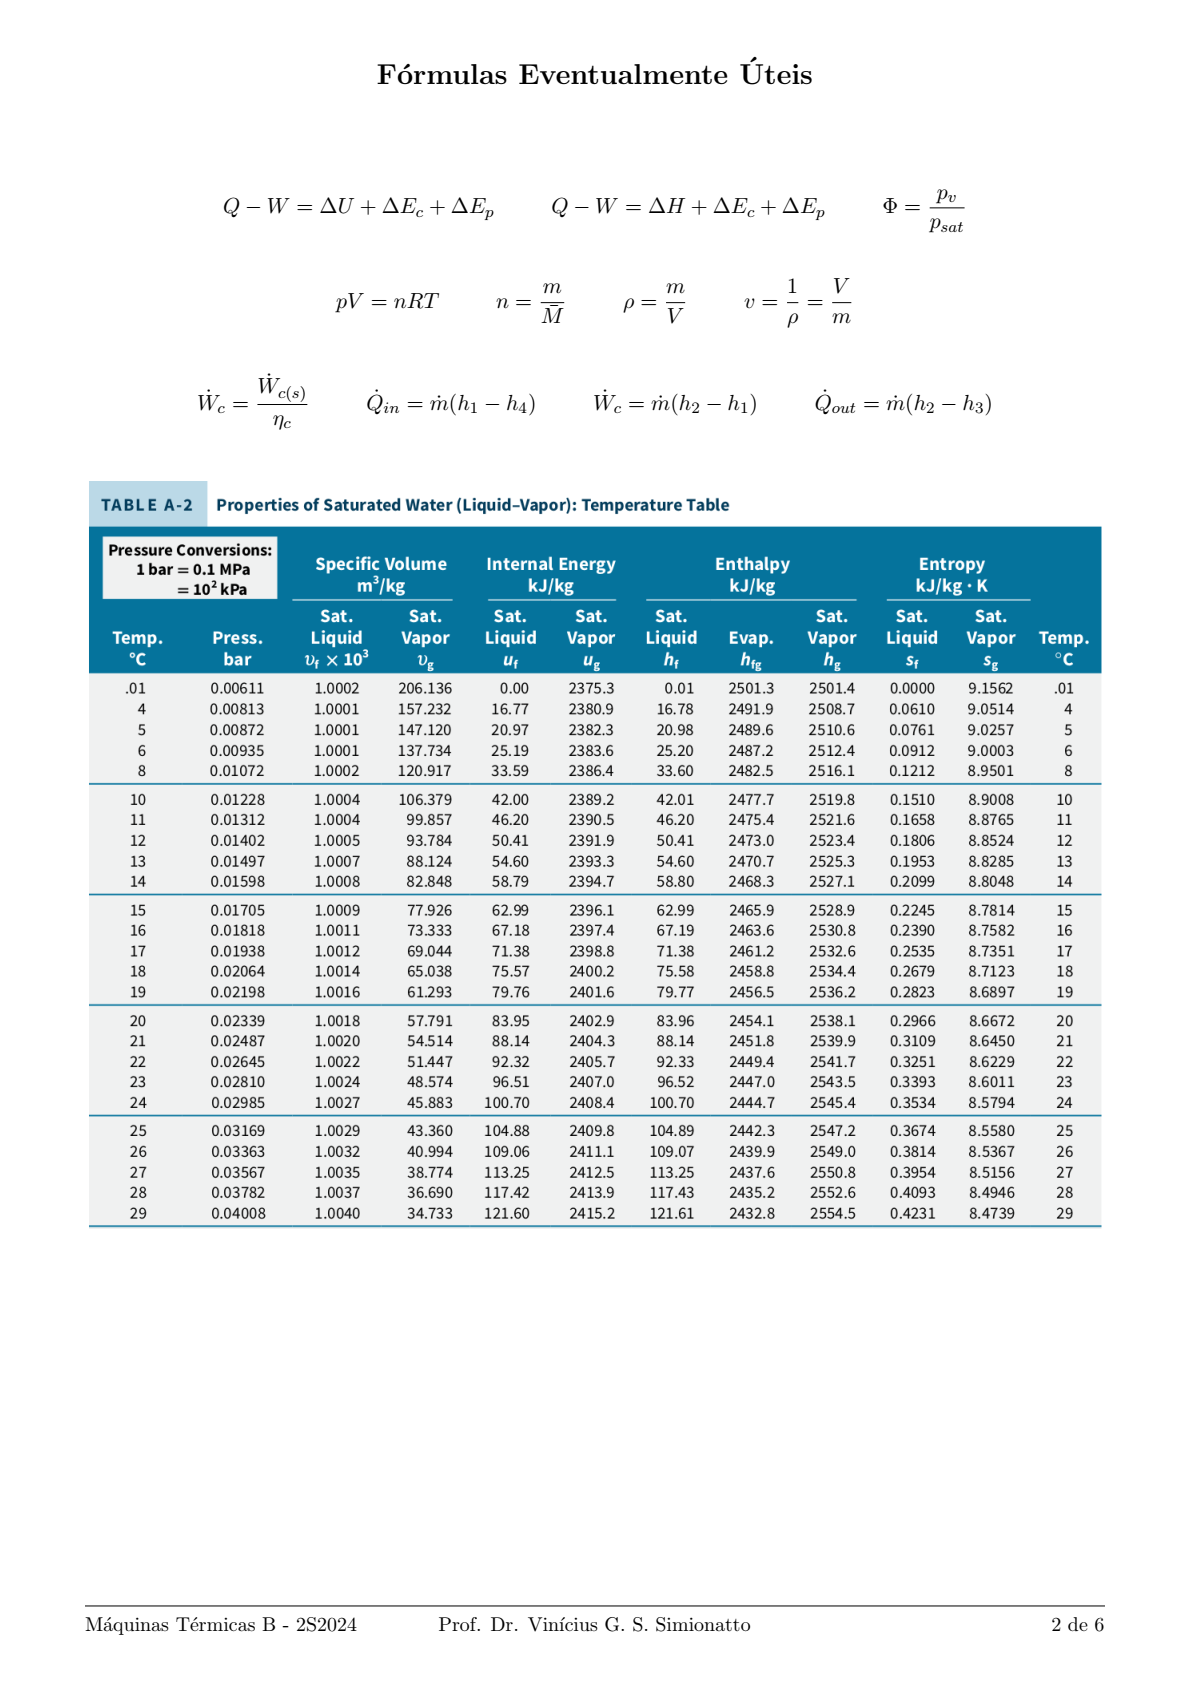

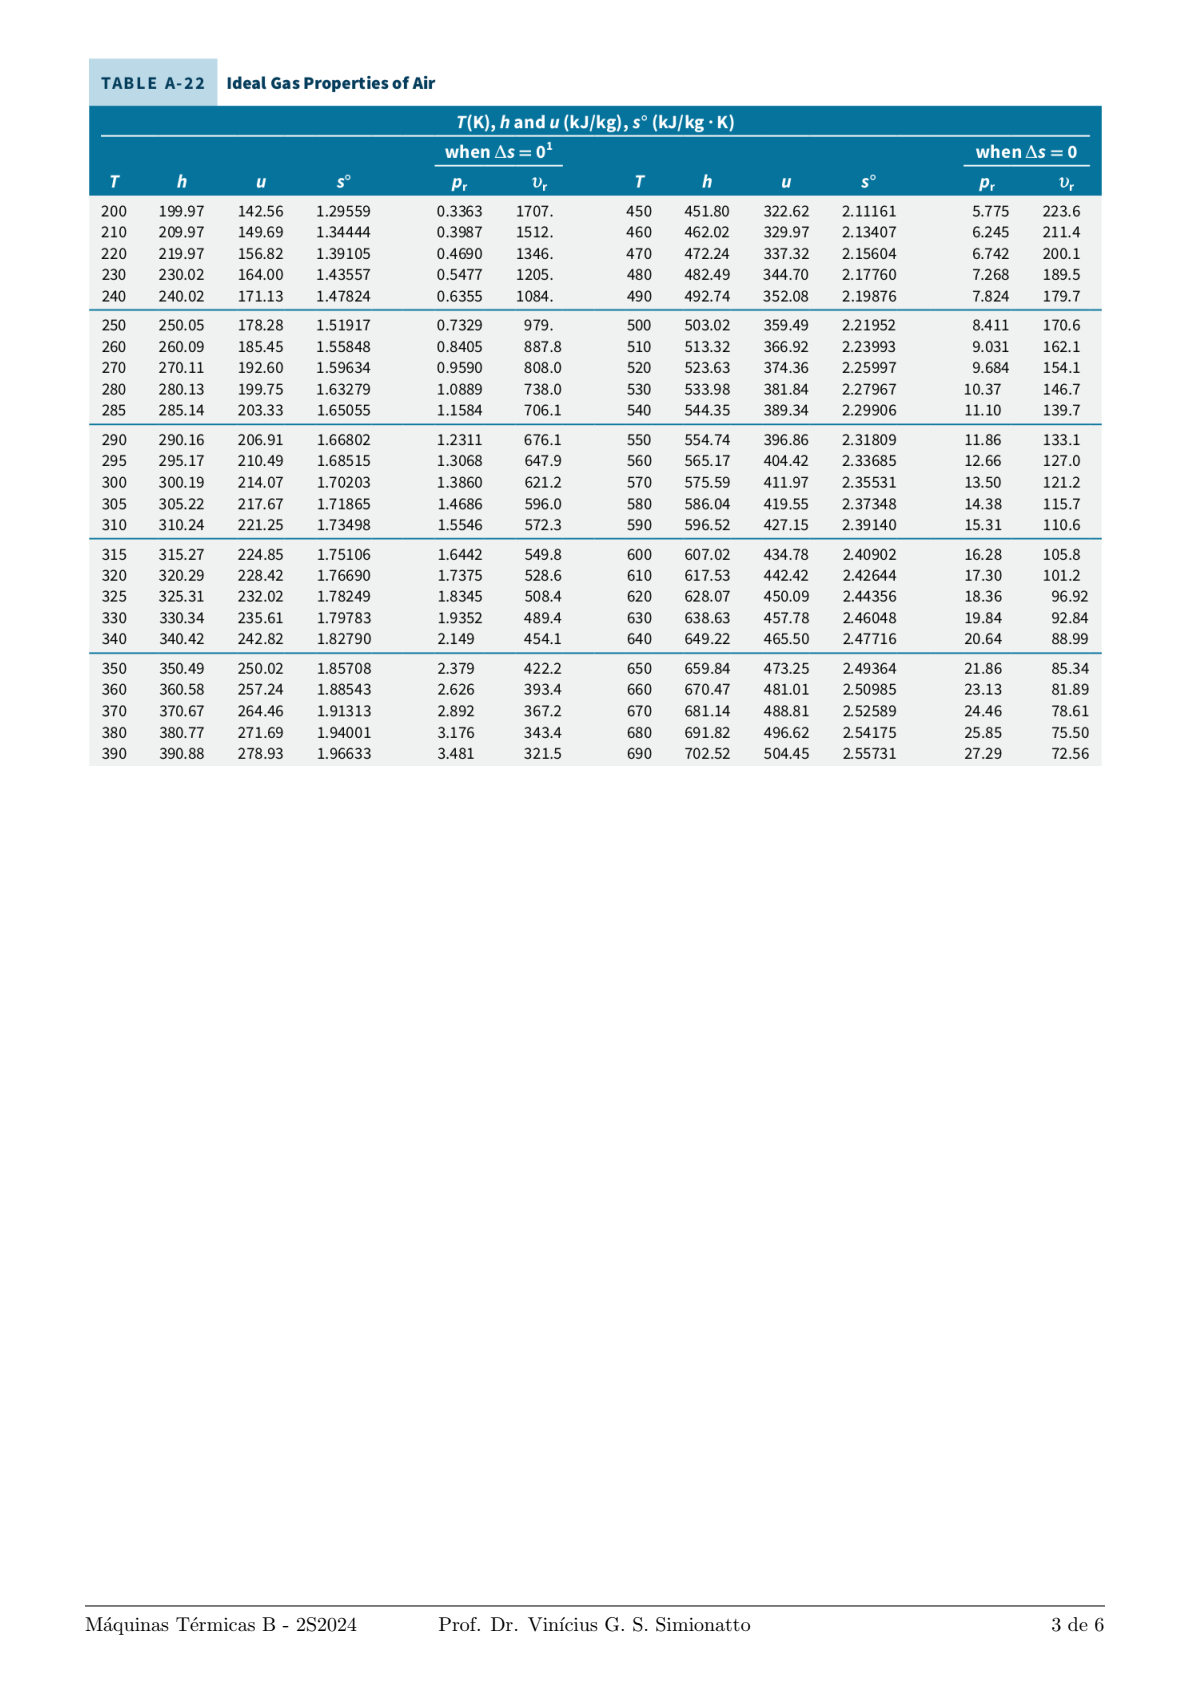

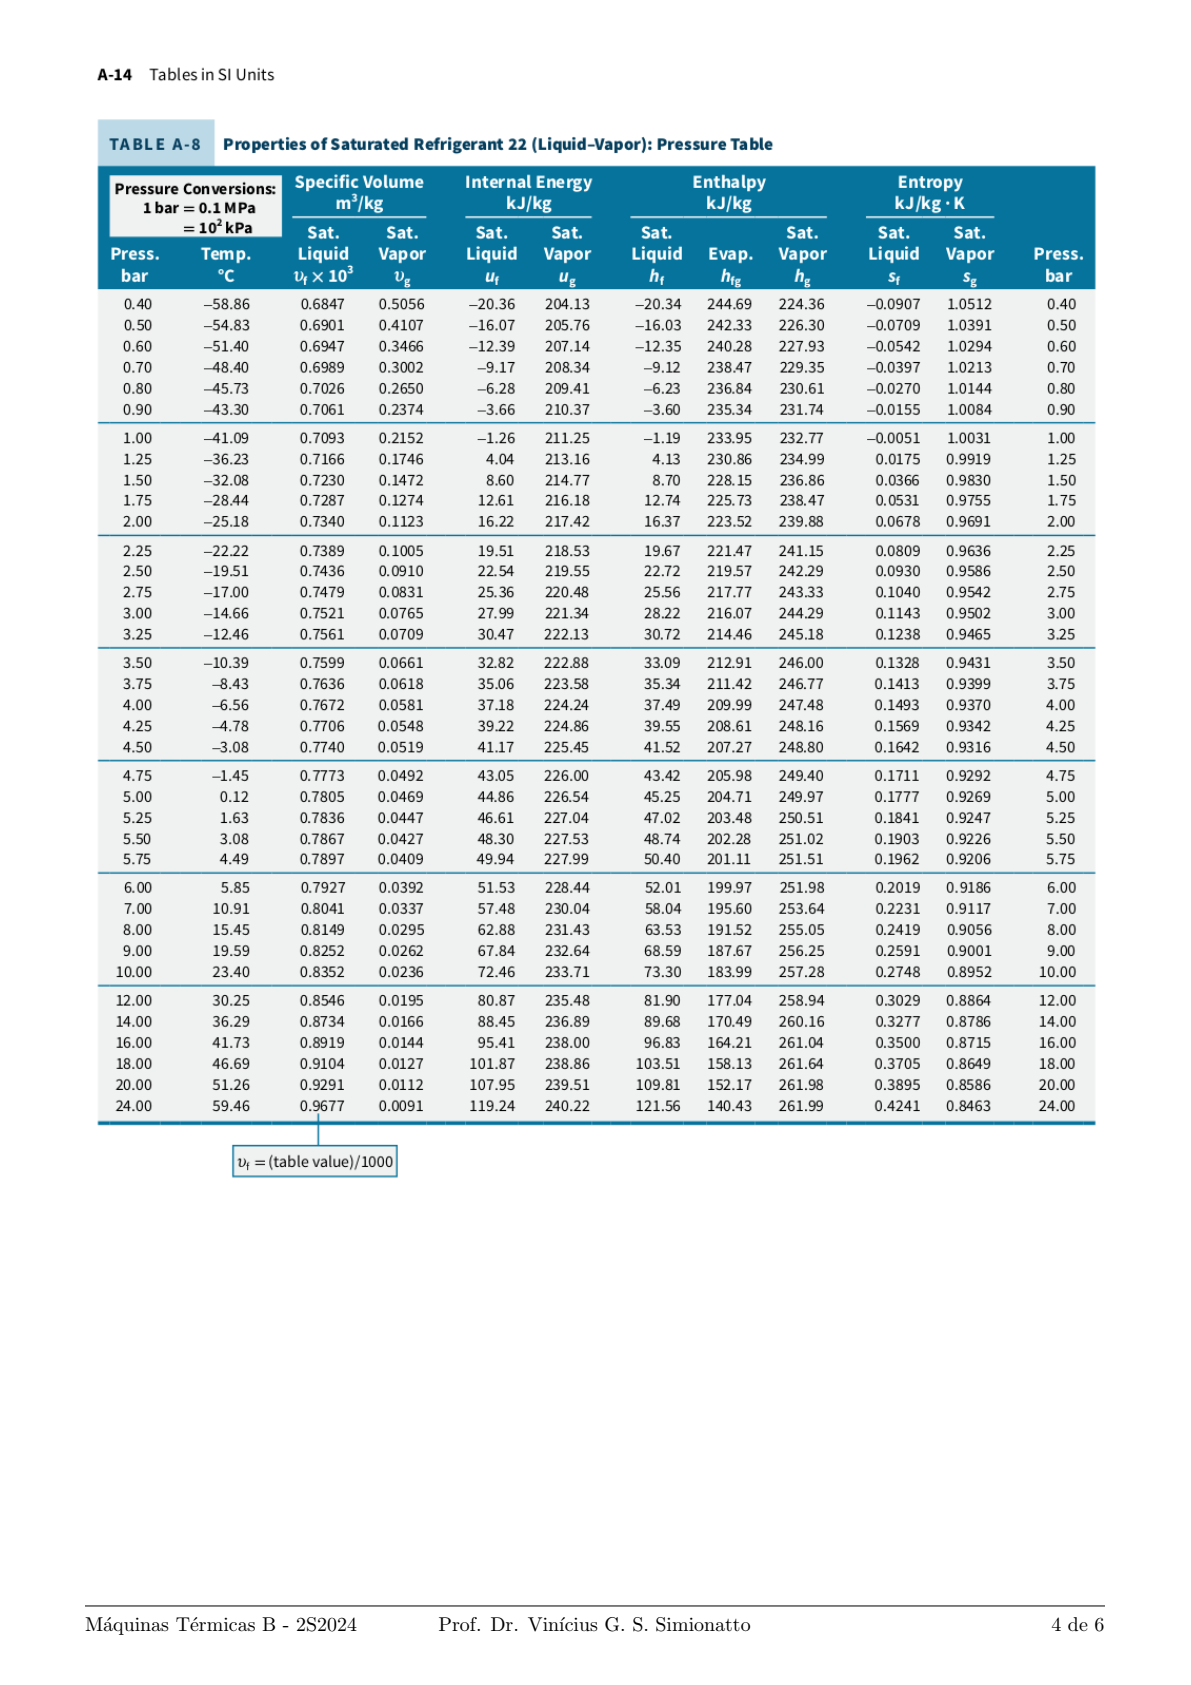

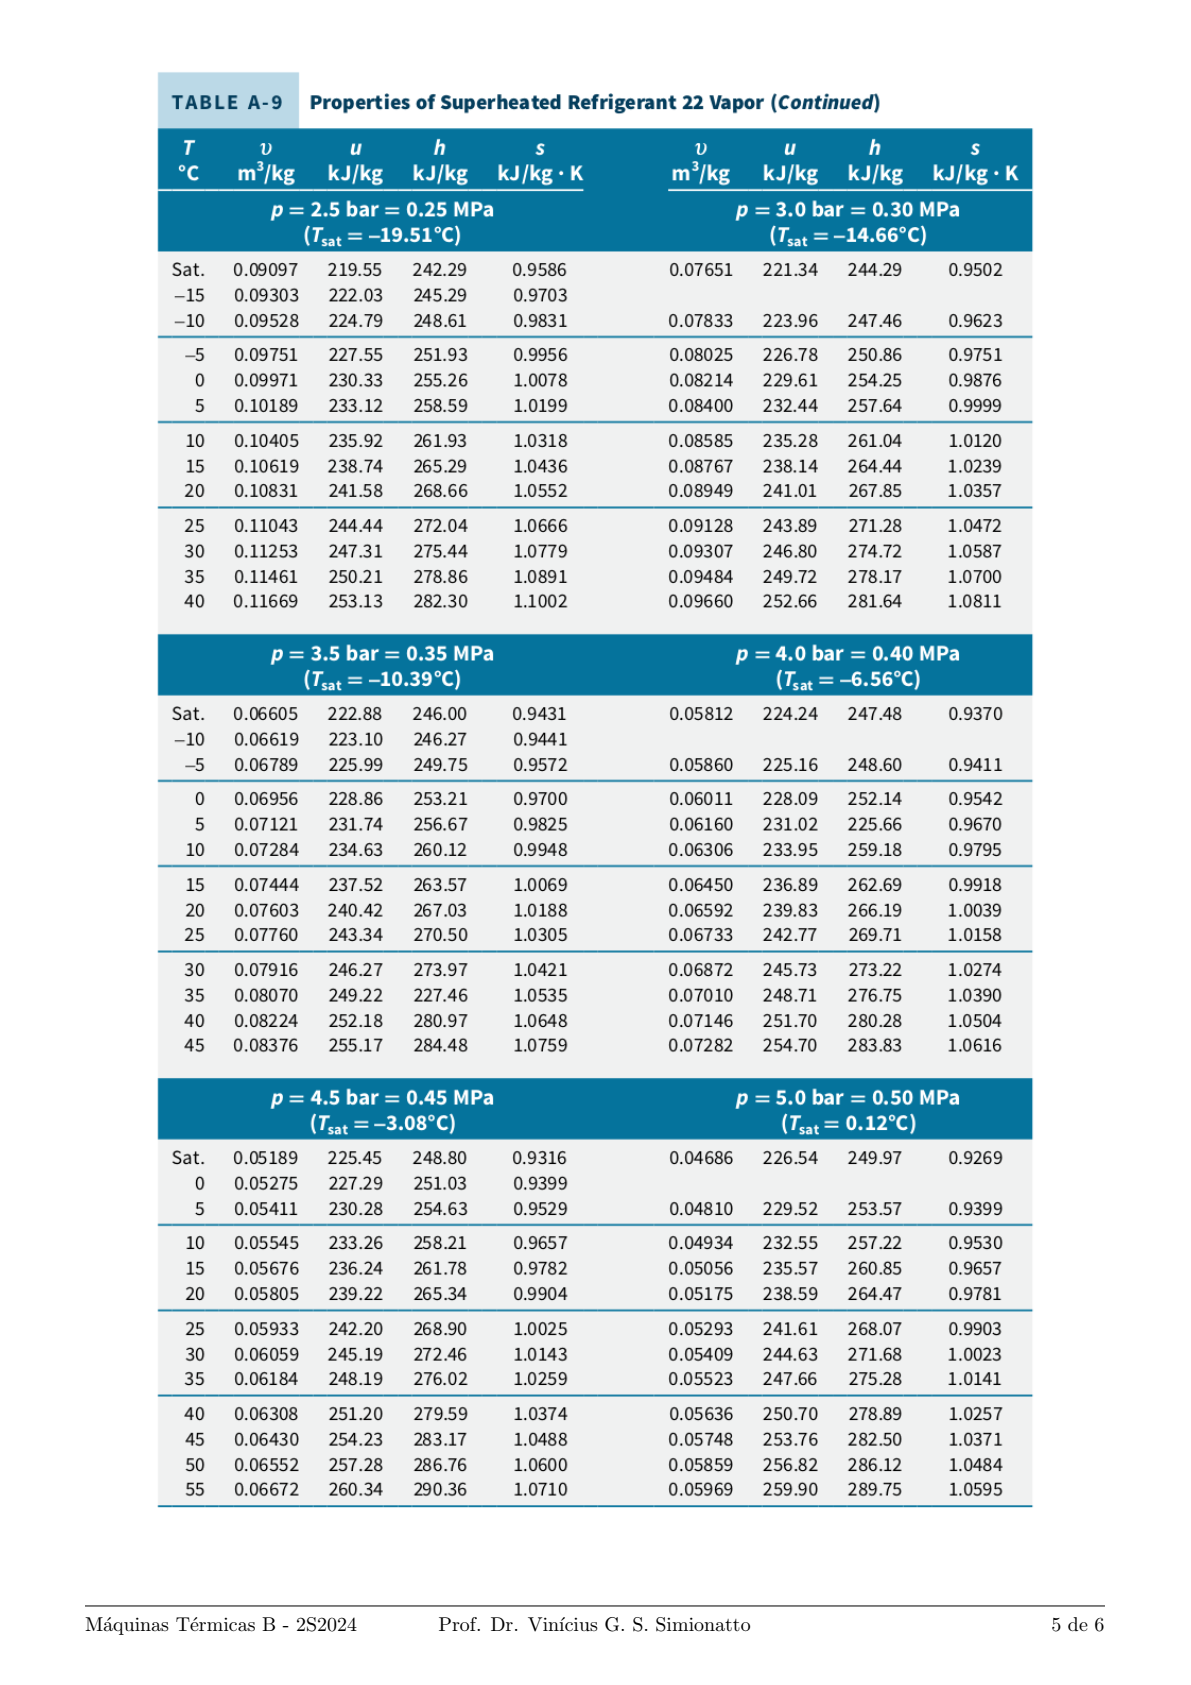

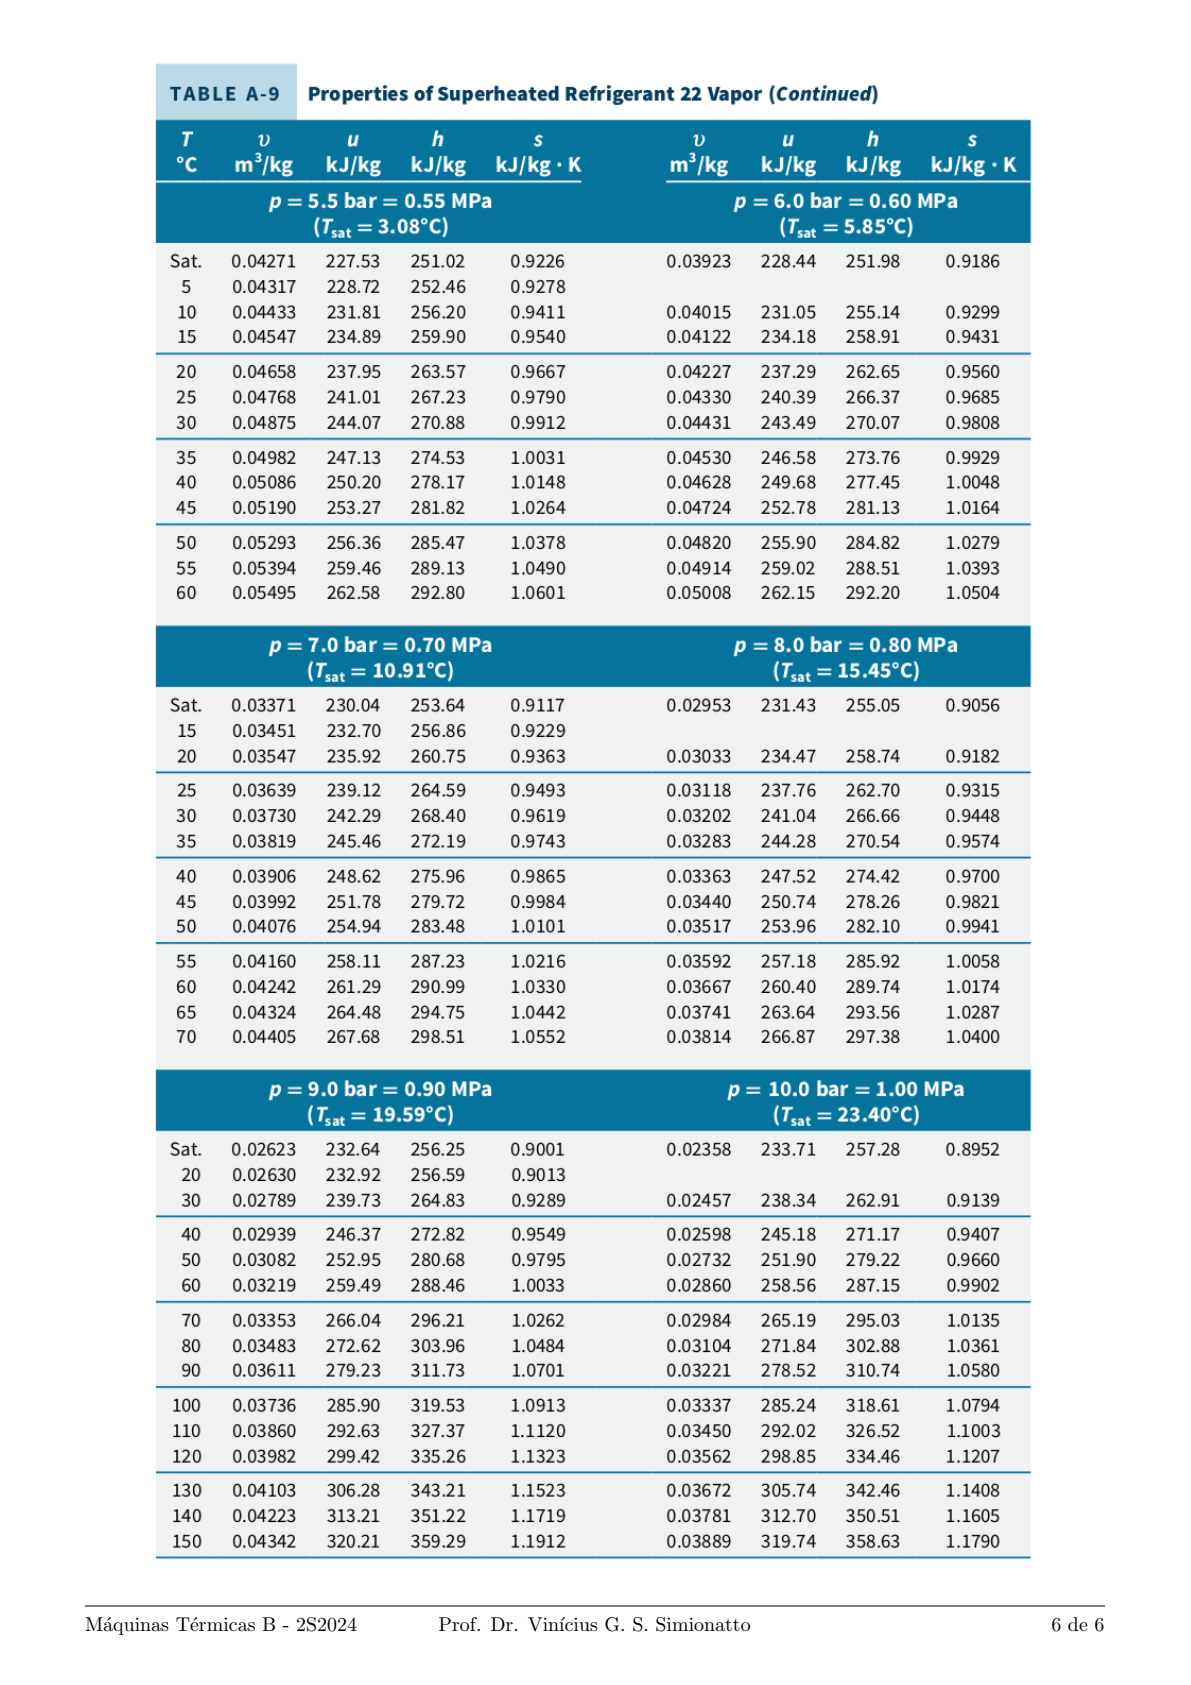

Resolução

### Questão 1 a)

Para calcular esta vazão mássica, é necessário calcular a quantidade de ar seco e vapor d'água por $\mathrm{m^3}$ de ar úmido. Com os dados disponíveis, é possível fazê-lo com o ar fornecido pelo aparelho ao ambiente.

Para tanto se utiliza o modelo de gás ideal:

$$
pV = \frac{m}{\bar{M}} R T
$$

Dividindo ambos os lados por $m$ se obtém:

$$
pv = \frac{RT}{\bar{M}}
$$

, sendo $v$ o volume específico do gás.

Assim, pode-se calcular a quantidade de gás na subatância através de:

$$
\frac{1}{v} = \rho = \frac{p \bar{M}}{RT}
$$

Para o vapor d'água, sabe-se que a umidade relativa é de $\phi = 83,63\%$, e assim se pode calcular a pressão de vapor do vapor d'água na mistura conhecendo a pressão de aturação deste vapor a $15^\circ\mathrm{C}$, disponível na tabela de saturação da água.

$$
@\; 15^\circ\mathrm{C}: P_{sat} = 1705\,\mathrm{Pa}
$$

$\phantom{a}$

$$
p_v = \phi P_{sat} = 1425,89\,\mathrm{Pa}
$$

Assim, a quantidade de vapor d'água na mistura é dada por:

$$
\rho_v = \frac{p_v\bar{M}_v}{RT} = \frac{1425,89\,\mathrm{Pa}\times18\, \mathrm{g/mol}}{8,314\,\mathrm{J/mol.K}\times 288 \,\mathrm{K}} = 10,72 \,\mathrm{g/m^3}
$$

E a quantidade de ar seco na mistura é dada por:

$$
\rho_s = \frac{p_s\bar{M}_s}{RT} = \frac{(100000 - 1425,89)\,\mathrm{Pa}\times 28,97\, \mathrm{g/mol}}{8,314\,\mathrm{J/mol.K}\times 288 \,\mathrm{K}} = 1192,64 \,\mathrm{g/m^3}
$$

Assim, a densidade da mistura a $15^\circ\mathrm{C}$ é de:

$$
\rho_{au} = \rho_s + \rho_v = 1,2034 \,\mathrm{kg/m^3}
$$

A mistura a $15^\circ\mathrm{C}$ é fornecida ao cômodo a uma taxa de $19\,\mathrm{m^3/min}$. Assim, a vazão mássica da mistura é dada por:

$$
\dot{m}_{au} = Q_{au} \rho_{au} = \left(\frac{19\,\mathrm{m^3/min}}{60\,\mathrm{s/min}}\right) 1,2034 \,\mathrm{kg/m^3} = 0,3811 \,\mathrm{kg/s}
$$



In [11]:
phi = 0.8363  # Umidade relativa a 15°C
Psat = 1705   # Pa

pv = phi * Psat
print(f'Pressão de vapor: {pv:.2f} Pa')

R = 8.314  # J/mol.K
Tas = 288   # K

Mv = 18  # g/mol

rho_v = (pv * Mv / (R * Tas))/1000  # g/m^3 -> kg/m^3
print(f"Quantidade de vapor d'água na mistura: {1000*rho_v:.2f} g/m³")

Patm = 1e5  # Pa
ps = Patm-pv

Ms = 28.97  # g/mol

rho_s = (ps * Ms / (R * Tas))/1000  # g/m^3 -> kg/m^3
print(f"Quantidade de ar seco na mistura: {1000*rho_s:.2f} g/m³")


rho_au = rho_s + rho_v
print(f"Quantidade de ar úmido na mistura: {rho_au:.4f} kg/m³")

Qau = 19/60  # m^3/min -> m^3/s

dm_au = Qau * rho_au
print(f"Vazão mássica da mistura: {dm_au:.4f} kg/s")

Pressão de vapor: 1425.89 Pa
Quantidade de vapor d'água na mistura: 10.72 g/m³
Quantidade de ar seco na mistura: 1192.64 g/m³
Quantidade de ar úmido na mistura: 1.2034 kg/m³
Vazão mássica da mistura: 0.3811 kg/s


### Questão 1 b)

Para calcular a entalpia específica de uma mistura de ar seco e vapor d'água, deve-se, primeiramente, buscar a entalpia específica de cada um nas tabelas termodinâmicas, sendo $h_v$ a entalpia específica do vapor d'água e $h_s$ a do ar seco.

Com elas e as quantidades de água e ar seco na mistura se pode calcular a entalpia volumétrica através de:

$$
H_v = h_s \rho_s + h_v \rho_v
$$

A entalpia específica da mistura é então dada por:

$$
h_{au} = \frac{H_v}{\rho_{au}} = \frac{H_v}{\rho_s + \rho_v}
$$

A umidade absoluta da mistura ($w$) é a relação entre a massa de vapor d'água e a de ar seco na mistura. Ou seja:

$$
w = \frac{\rho_v}{\rho_s}
$$

Assim, a entalpia específica da mistura pode ser escrita na forma:

$$
h_{au} = \frac{h_s + wh_v}{1+w}
$$

Assim:

$$
w = \frac{\rho_v}{\rho_s} = 8,9877 \,\mathrm{g/kg\,(ar\, seco)}
$$

Das tabelas termodinâmicas, a $15^\circ\mathrm{C}$:

- $h_v = 2528,9\,\mathrm{kJ/kg}$
- $h_s = 288,15\,\mathrm{kJ/kg}$

Com estes dados:

$$
h_{as} = 308,11\,\mathrm{kJ/kg}
$$

In [17]:
w = rho_v / rho_s

print(f"w = {1000*w:.4f} g (vapor d'água)/kg (ar seco)")

def interpola(p1: tuple[float, float], p2: tuple[float, float], x: float) -> float:
    return p1[1] + (p2[1] - p1[1]) * (x - p1[0]) / (p2[0] - p1[0])

hvs = 2528.9  # kJ/kg
hss = interpola((285, 285.14), (290, 290.16), Tas)

has = (hss + w * hvs) / (1 + w)

print(f"Entalpia específica da mistura: {has:.2f} kJ/kg")

w = 8.9877 g (vapor d'água)/kg (ar seco)
Entalpia específica da mistura: 308.11 kJ/kg


### Questão 1 c)

Para $22^\circ\mathrm{C}$, das tabelas termodinâmicas:
- $h_v = 2541,7\,\mathrm{kJ/kg}$
- $h_s = 295,17\,\mathrm{kJ/kg}$

Como a umidade relativa do ar de saída é menor do que $100\%$, não houve condensação e o ar de entrada deve possuir umidade relativa menor, mas a mesma umidade absoluta ($w$). Portanto:

$$
h_{ae} = \frac{h_s + wh_v}{1+w} = 315,18\,\mathrm{kJ/kg}
$$

In [19]:
hve = 2541.7  # kJ/kg
hse = 295.17  # kJ/kg

hae = (hse + w * hve) / (1 + w)

print(f"Entalpia específica do ar de saída: {hae:.2f} kJ/kg")

Entalpia específica do ar de saída: 315.18 kJ/kg


---

_OBS: Na elaboração da avaliação, o item d) deveria ter solicitado pela quantidade de calor **absorvida** pelo **evaporador** e não a rejeitada pelo condensador._

_Por isso, os itens d) e j) terão sua ordem invertida._

---

### Questão j)

A capacidade de refrigeração é a potência absorvida pelo evaporador do ar condicionado, que é exatamente a potência perdida pelo ar úmido ao passar pelo condensador. Assim:

$$
\dot{Q}_{in} = \dot{m}_a (h_{ae}-h_{as}) = 2,506\,\mathrm{kW}
$$

In [21]:
dm_au = 0.35  # kg/s
dif_h_au = 7.16  # kJ/kg

dQin = dm_au * dif_h_au * 1000  # kW -> W

print(f"Capacidade de refrigeração: {dQin/1000:.4f} kW")

Capacidade de refrigeração: 2.5060 kW


### Questão e)

No estado 1 o gás refrigerante está a $4\,\mathrm{bar}$ e $10^\circ\mathrm{C}$. Inspecionando a tabela de saturação, observa-se que o gás está em estado de vapor superaquecido. Da tabela de vapor superaquecido:

- $h_1 = 259,18\,\mathrm{kJ/kg}$

No estado 3 o gás está a 9 bar e no estado de líquido saturado. Da tabela de saturação:

- $h_3 = 68,59\,\mathrm{kJ/kg}$

### Questão f)

Para calcular a compressão com _eficiência isentrópica_, calcula-se primeiro o processo isentrópico. No estado 1, a entropia é dada por:

- $s_1 = 0,9795\,\mathrm{kJ/kg.K}$

Após a compressão, a pressão final é a mesma do estado 3, de $9\,\mathrm{bar}$ e a entropia deve ser a mesma do estado 1. No estado 2, após a compressão, é inevitável que o R22 esteja no estado de vapor superaquecido. Assim, da tabela de vapor superaquecido:

- $h_{2s} = 280,68\,\mathrm{kJ/kg}$

Com isso, pode-se calcular a potência injetada no compressor por unidade de fluxo de massa de R22 para o processo isentrópico:

$$
\frac{\dot{W}_{cs}}{\dot{m}_r} = h_{2s}-h_1 = 21,5\,\mathrm{kJ/kg}
$$

A potência real de compressão por unidade de fluxo de massa de R22 é dada por:

$$
\dot{W}_c/\dot{m}_r = \frac{\dot{W}_{cs}/\dot{m}_r}{\eta_c} = 30,71\,\mathrm{kJ/kg}
$$

Finalmente:

$$
h_2 = \frac{\dot{W}_c}{\dot{m}_r} + h1 = 289,89\,\mathrm{kJ/kg}
$$

In [24]:
h1 = 259.18   # kJ/kg
h3 = 68.59    # kJ/kg
h4 = h3
h2s = 280.68  # kJ/kg

Wcs_mr = h2s - h1

print(f"Potência injetada no compressor por unidade de fluxo de massa: {Wcs_mr:.2f} kJ/kg")

nc = 0.7

Wc_mr = Wcs_mr / nc

print(f"Potência real de compressão por unidade de fluxo de massa: {Wc_mr:.2f} kJ/kg")

h2 = Wc_mr + h1

print(f"Entalpia específica do estado 2: {h2:.2f} kJ/kg")

Potência injetada no compressor por unidade de fluxo de massa: 21.50 kJ/kg
Potência real de compressão por unidade de fluxo de massa: 30.71 kJ/kg
Entalpia específica do estado 2: 289.89 kJ/kg


### Questão 1 g)

O processo de expansão pela válvula expansora é isentrópico e adiabático. Por isso:

- $h_4 = h_3 = 68,59\,\mathrm{kJ/kg}$

### Questão 1 h)

No estado 4 o fluido está parcialmente em estado de líquido saturado e parcialmente em estado de vapor saturado. Assim, a entalpia do estado 4 pode ser representada pelas entalpias de líquido saturado ($h_f$) e vapor saturado ($h_g$) do refrigerante à pressão de $4\,\mathrm{bar}$, que é a pressão do ramo de baixa pressão do ar-condicionado. Adotando $x$ como um coeficiente de 0 a 1:

$$
h_4 = xh_f + (1-x)h_g
$$

Isolando $x$:

$$
x = \frac{h_4-h_g}{h_f-h_g} = 85,19\,\mathrm{\%}
$$

In [26]:
hf = 37.49   # kJ/kg
hg = 247.48  # kJ/kg

x = (h4-hg)/(hf-hg)

print(f"Quantidade de líquido saturado no estado 4: {100*x:.2f}%")

Quantidade de líquido saturado no estado 4: 85.19%


### Questão 1 i)

Do lado interno do evaporador, a quantidade de calor trocada é dada por:

$$
\dot{Q}_{in} = \dot{m}_r(h_1-h_4)
$$

Portanto:
$$
\dot{m}_r = \frac{\dot{Q}_{in}}{h_1-h_4} = 0,013149\,\mathrm{kg/s}
$$

In [29]:
dm_r = (dQin/1000)/(h1-h4)

print(f"Vazão mássica de R22: {dm_r:.6f} kg/s")

Vazão mássica de R22: 0.013149 kg/s


### Questão 1 d)

A potência rejeitada pelo evaporador é dada por:

$$
\dot{Q}_{out} = \dot{m}_r (h_2-h_3) = 2,9099\,\mathrm{kW}
$$

In [31]:
dQout = dm_r * (h2-h3)

print(f"Potência rejeitada pelo evaporador: {dQout:.4f} kW")

Potência rejeitada pelo evaporador: 2.9099 kW


### Questão 1 k)

O coeficiente de desempenho deste sistema é dado por:

$$
\beta = \frac{\dot{Q}_{in}}{\dot{W}_c} = 6,2053
$$

In [33]:
beta = (dQin/1000)/(Wc_mr*dm_r)

print(f"Coeficiente de desempenho: {beta:.4f}")

Coeficiente de desempenho: 6.2053
